# Help the Bot to Escape the Maze (**20 points**)
By Johnson Zhuang

<br/>
Please run the block below to import the necessary tools

In [1]:
import micropip
await micropip.install("matplotlib")
from mazeutils import Bot, Cardinal, draw_maze, maze_demo, maze_beginner_1, maze_beginner_2, maze_ultimate, run_maze, show_scoreboard

## Introduction
A little bot is lost in the maze. You will need to help it find its way out.

Here is how the maze looks like:
- Dark gray square is the bot.
- Black square is the exit.
- Light gray squares are the walls
- White squares are where the bot can move to.

### What you need to implement
You need to implement the function defining the strategy how the bot decide to move for each step.

e.g. You can always ask the bot to move up for each step, or you can apply some decision making to make the bot smarter.


### Functions you can use

- `bot.move()`: Ask the bot to move one step to the current cardinal direction if there is no wall
- `bot.turn(cardinal)`: Ask the bot to turn to the cardinal direction
- `bot.can_move()`: Tell if there is a wall in the current cardinal direction the bot is facing by returning a Boolean value. `True` if there is no wall; `False` if there is a wall
- `bot.get_cardinal()` will tell what cardinal direction the bot is current heading for. e.g. If the bot is going north, `get_cardinal()` will be `Cardinal.NORTH`. If the bot `turn(Cardinal.WEST)`, `get_cardinal()` will change to `Cardinal.WEST`

FYI, the value for cardinal direction can be `Cardinal.NORTH`, `Cardinal.SOUTH`, `Cardinal.EAST`, `Cardinal.WEST`


### Constraints
- In the functions you are going to implement, you are allowed to ask the bot to move by **only one step**. i.e. `bot.move` should only be executed only once in the function.

### Demo
In this task, as a master of maze, I'll demonstrate this thing works.

Below is a very, very, very simple maze. Or should I call it a maze?

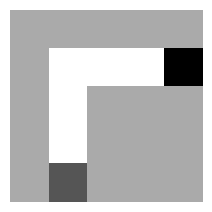

In [3]:
draw_maze(maze_demo)

Let me show you how I ask the bot to go to the exit! (Try running it and see)

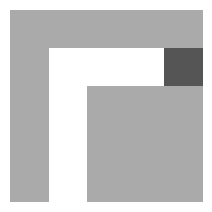

That is how a maze master does things!


In [5]:
# This is my strategy of the bot movement for each step
def move_east_if_cannot_move_north(bot):
    # These lines will tell the bot to move to the NORTH until it faces a wall, and then turn to the EAST and continue moving.
    if bot.can_move():
        bot.move()
    else:
        bot.turn(Cardinal.EAST)
        bot.move()

run_maze(maze_demo, move_east_if_cannot_move_north, "demo", True)

## Beginner Mazes
Now it's your turn to help the bot, but with two little more complex mazes.

For the first maze, I'll give you the high-level strategy, and you need to fill in the details. This one is worth **4 points**.

For the second maze, you'll be completely on your own, but if you manage to solve the first one, the second one is just a piece of cake. This one is worth **6 points**.


### More constraints
- Find the exit within 15 steps

<details>
<summary>hint</summary>
Try making use of `bot.get_cardinal()` to know what direction is the bot currently going to
</details>

### Beginner Maze 1 (**4 points**)

The initial direction the bot is facing is `Cardinal.NORTH`

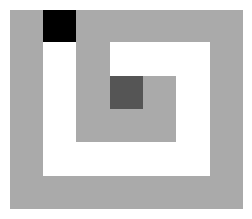

In [6]:
draw_maze(maze_beginner_1)

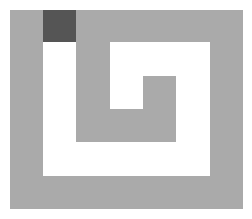

Thank you! You are doing a great job! Here is your 4 points.


In [8]:
def turn_right(bot):
    cardinal = bot.get_cardinal()
    match cardinal:
        case Cardinal.NORTH:
            bot.turn(Cardinal.EAST)
        case Cardinal.EAST:
            bot.turn(Cardinal.SOUTH)
        case Cardinal.SOUTH:
            bot.turn(Cardinal.WEST)
        case Cardinal.WEST:
            bot.turn(Cardinal.NORTH)

# I present you the strategy at high level: Just ask the bot to turn right and move if it cannot move forward!
# But you still need to implement the turn_right function to make it work!
def move_right_if_cannot_move_forward(bot):
    if not bot.can_move():
        turn_right(bot)
    bot.move()    


run_maze(maze_beginner_1, move_right_if_cannot_move_forward, "beginner1")

### Beginner Maze 2 (**6 points**)

Very similar to the first maze right? You can try implementing the utility function and fill in your strategy.

The initial direction the bot is facing is `Cardinal.NORTH`

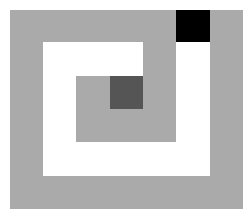

In [8]:
draw_maze(maze_beginner_2)

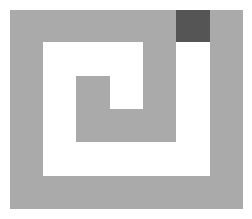

Thank you! You are doing a great job! Here is your 6 points.


In [10]:
# This is the last piece of code hint I can leave for you. If you don't need it for your strategy, just leave it as pass
def turn_left(bot):
    cardinal = bot.get_cardinal()
    match cardinal:
        case Cardinal.NORTH:
            bot.turn(Cardinal.WEST)
        case Cardinal.EAST:
            bot.turn(Cardinal.NORTH)
        case Cardinal.SOUTH:
            bot.turn(Cardinal.EAST)
        case Cardinal.WEST:
            bot.turn(Cardinal.SOUTH)

def turn_180(bot):
    cardinal = bot.get_cardinal()
    match cardinal:
        case Cardinal.NORTH:
            bot.turn(Cardinal.SOUTH)
        case Cardinal.EAST:
            bot.turn(Cardinal.WEST)
        case Cardinal.SOUTH:
            bot.turn(Cardinal.NORTH)
        case Cardinal.WEST:
            bot.turn(Cardinal.EAST)

def your_strategy(bot):
    if bot.can_move():
        bot.move()
    else:
        turn_right(bot)
        if bot.can_move():
            bot.move()
        else:
            turn_180(bot)
            if bot.can_move():
                bot.move()
            else:
                turn_left(bot)
                bot.move()

run_maze(maze_beginner_2, your_strategy, "beginner2")

## Ultimate Quest! (**10 points**)
The bot is so happy that it reaches the exit, but that happiness does not last long as it sees another long way and wall... Another HUGE MAZE!

If you are lucky enough, probably you have got the solution from the previous maze. If that does not work, you may need to think harder... 

This game is worth **10 points**!

The initial direction the bot is facing is `Cardinal.NORTH`

### More constraints
- Find the exit within 50 steps

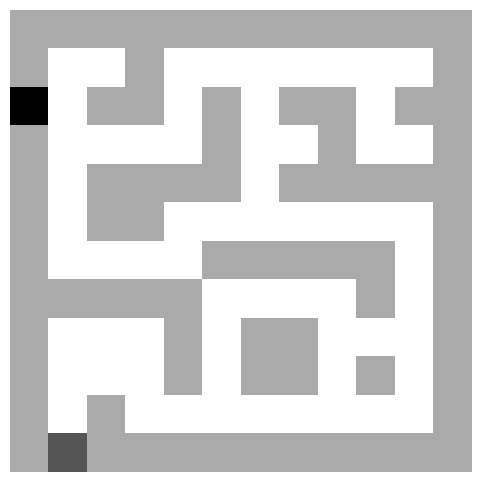

In [8]:
draw_maze(maze_ultimate)

For this maze the strategy as simple as what we use for the previous maze (at least for beginner maze 1) obviously does not work.

Then how can we solve it? I do hope you can come up with a strategy on your own. If you cannot get one, try opening the hint to get a relatively simple solution.

You are free to reuse the previous implemented functions `turn_right` or `turn_left` (if you have implemented it) for your strategy.

<details>
<summary>hint</summary>
Do you know there is a golden rule for certain types of maze that will always work? And luckily this maze falls into that certain kind of maze!
So the golden rule is: as long as you follow one side of the wall, you will eventually find the exit of the maze.
</details>

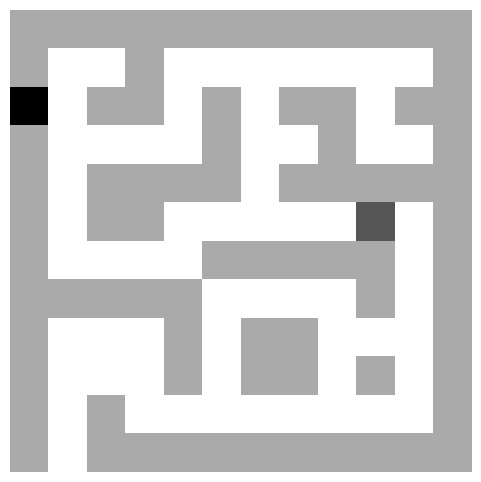

Sorry you failed to help the bot within 50 steps...


In [12]:
def your_ultimate_strategy(bot):
    turn_left(bot)
    if not bot.can_move():
        turn_right(bot)
        if bot.can_move():
            bot.move()
        else:
            turn_right(bot)
            if bot.can_move():
                bot.move()
        else:
            turn_180(bot)
            if bot.can_move():
                bot.move()
            else:
                turn_left(bot)
                bot.move()

run_maze(maze_ultimate, your_ultimate_strategy, "ultimate")

### Please run this block to see your scores!

In [ ]:
show_scoreboard()